# Wpływ usuwania mechanizmu usuwania linków na wybrane metryki

Symulacje dla `p={0.3, 0.2, 0.05, 0.01}` przy $\beta$=0.01, 0.02, ..., 0.1 oraz przy początkowym odestku osób z pozywną opinią `fracPos = 0.0, 0.01, 0.02, ..., 1.0`. Dodam jeszcze, że wszystkie wykresy przedstawiają wyniki uśrednione po 10 realizacjach.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 1
nRuns: 10
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.01
  q: 6
epidemicLayerParameters:
  beta: 0.9
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
proPisFraction: 0.0 # do not use this!
pisVaccinationCorrelation: 0.0
outputFolder: simulations/results_remove_links_parameters_beta_range_small_p_different_dynamics_all
firstParameterRange:
  start: 0.0
  end: 1.0
  count: 51
  vals: null
  type: positiveOpinionFraction
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 21
  vals: [0.01, 0.02, 0.05, 0.1, 0.5]
  type: beta
thirdParameterRange:
  start: 0.0
  end: 0.0
  count: 0
  vals: [1, 2, 5, 10, 20]
  type: nQVoterPerStep
linksRemoval: false
nQVoterPerStep: 1
```


In [21]:
def load_df(prefix, fracPos, beta, folder, p, qvotersteps, nagents=10000, nsteps=1000000, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/{folder}/{prefix}_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_PIS=0.0_EPIDEMIC=beta={beta}_zeta=0.50_alpha=0.20_gamma=0.50_mu=0.90_kappa=0.10_QVOTERSTEPS={qvotersteps}_NRUN={n}.tsv"
        
        df = pd.read_csv(path, sep="\t")
        dfs.append(df)
    dfs1 = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).mean(axis=0),
                        index=df.index, 
                        columns=df.columns)
    return dfs1


fPs = ['{:.2f}'.format(x / 100) for x in list(range(101))][::2]

new_fPs = []
for idx, fP in enumerate(fPs):
    if idx % 5 == 0:
        new_fPs.append('{:.1f}'.format(float(fP)))
    else:
        new_fPs.append(fP)

# betas = ['{:.2f}'.format(x / 100) for x in list(range(1, 11))][:2]
betas = ['0.01', '0.02', '0.05', '0.10', '0.50']

print('Opinion fraction: ', new_fPs)
print('Betas: ', betas)

Opinion fraction:  ['0.0', '0.02', '0.04', '0.06', '0.08', '0.1', '0.12', '0.14', '0.16', '0.18', '0.2', '0.22', '0.24', '0.26', '0.28', '0.3', '0.32', '0.34', '0.36', '0.38', '0.4', '0.42', '0.44', '0.46', '0.48', '0.5', '0.52', '0.54', '0.56', '0.58', '0.6', '0.62', '0.64', '0.66', '0.68', '0.7', '0.72', '0.74', '0.76', '0.78', '0.8', '0.82', '0.84', '0.86', '0.88', '0.9', '0.92', '0.94', '0.96', '0.98', '1.0']
Betas:  ['0.01', '0.02', '0.05', '0.10', '0.50']


In [23]:
def load_all_dfs(p, betas=betas, new_fPs=new_fPs,
                 path='results_remove_links_parameters_beta_range_small_p_different_dynamics_all',
                 qvotersteps=1):
    on_p = {}
    off_p = {}
    for beta in tqdm(betas):
        off_p_per_beta = []
        on_p_per_beta = []
        for f in new_fPs:
            df1 = load_df('off', f, beta, path, p, qvotersteps)
            df2 = load_df('on', f, beta, path, p, qvotersteps)
            off_p_per_beta.append(df1)
            on_p_per_beta.append(df2)
        off_p[beta] = off_p_per_beta
        on_p[beta] = on_p_per_beta
    return on_p, off_p

In [25]:
%%time

# on_p_0_3, off_p_0_3 = load_all_dfs('0.30')
# on_p_0_2, off_p_0_2 = load_all_dfs('0.20')
# on_p_0_1, off_p_0_1 = load_all_dfs('0.10')
# on_p_0_05, off_p_0_05 = load_all_dfs('0.05')

on_q1, off_q1 = load_all_dfs('0.01', qvotersteps=1)
on_q2, off_q2 = load_all_dfs('0.01', qvotersteps=2)
on_q5, off_q5 = load_all_dfs('0.01', qvotersteps=5)
on_q10, off_q10 = load_all_dfs('0.01', qvotersteps=10)
on_q20, off_q20 = load_all_dfs('0.01', qvotersteps=20)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 29.6 s, sys: 214 ms, total: 29.8 s
Wall time: 29.8 s


In [30]:
def time_max_infected(dfs):
    times = []
    for df in dfs:
        t = df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]
        times.append(t)
    return np.array(times)
    
def max_by_columns(dfs, column):
    val = []
    for df in dfs:
        i = df[column].max()
        val.append(i)
    return np.array(val)

def last_by_columns(dfs, column):
    val = []
    for df in dfs:
        i = df[column].to_numpy()[-1]
        val.append(i)
    return np.array(val)


def time_to_no_susceptible(dfs):
    val = []
    for df in dfs:
        i = df[df['susceptibleRate'] < 1e-2].step.values
        if len(i) >= 1:
            val.append(i[0])
        else:
            val.append(0)
    return val

In [31]:
colormap = plt.cm.get_cmap('viridis_r', 2*len(betas))
colors = [colormap(i) for i in range(2*len(betas))]

x = [float(x) for x in new_fPs] 


def plot_all_vals(ys, fun, ylabel, betas, ncol=1):
    i, j = 0, 0
    for y in ys:
        plt.plot(x, fun(y[0]), label=r'with, $\beta={}$'.format(betas[j]), color=colors[i])
        plt.plot(x, fun(y[1]), label=r'without, $\beta={}$'.format(betas[j]), color=colors[i+1])
        i += 2
        j += 1
    plt.legend(loc=(1.01, 0.05), ncol=ncol)
    plt.xlabel('positive opinion fraction')
    plt.ylabel(ylabel)    

### Kiedy nastąpi pik zachorowań w funkcji początkowej opinii agentów?

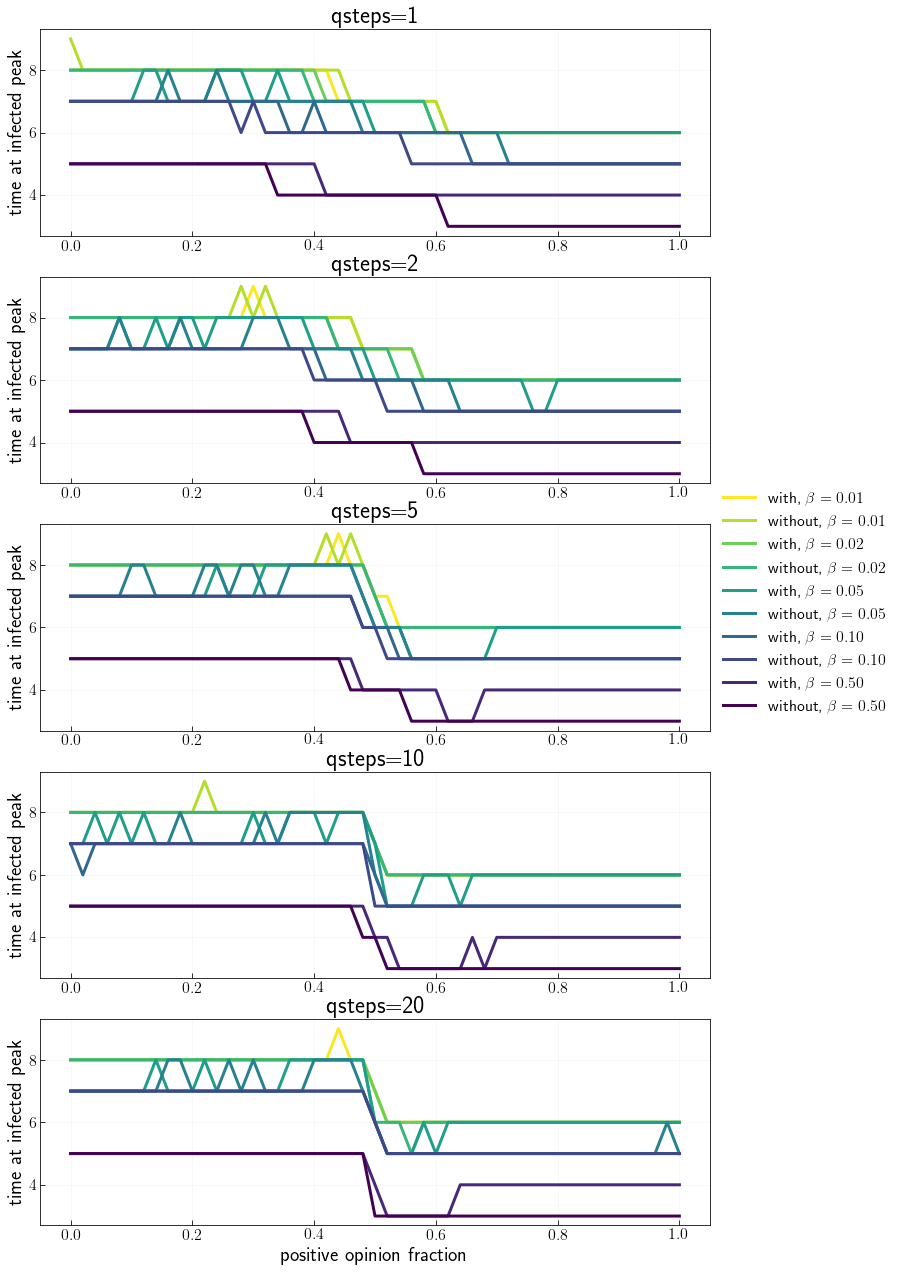

In [33]:
ys0 = list(zip(list(on_q1.values()), list(off_q1.values())))
ys1 = list(zip(list(on_q2.values()), list(off_q2.values())))
ys2 = list(zip(list(on_q5.values()), list(off_q5.values())))
ys3 = list(zip(list(on_q10.values()), list(off_q10.values())))
ys4 = list(zip(list(on_q20.values()), list(off_q20.values())))


plt.figure(figsize=(12, 22))
plt.subplot(5, 1, 1)
plot_all_vals(ys0, time_max_infected, 'time at infected peak', betas, ncol=2)
plt.title('qsteps=1')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 2)
plot_all_vals(ys1, time_max_infected, 'time at infected peak', betas, ncol=2)
plt.title('qsteps=2')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 3)
plot_all_vals(ys2, time_max_infected, 'time at infected peak', betas, ncol=1)
plt.title('qsteps=5')
plt.xlabel('')

plt.subplot(5, 1, 4)
plot_all_vals(ys3, time_max_infected, 'time at infected peak', betas, ncol=2)
plt.title('qsteps=10')
plt.xlabel('')
plt.legend('')

plt.subplot(5, 1, 5)
plot_all_vals(ys4, time_max_infected, 'time at infected peak', betas, ncol=2)
plt.title('qsteps=20')
plt.legend('')
plt.show()

In [34]:
def plot_infected_per_pos_opinion_fraction(prefix, posFraction, beta,
                                           path='results_remove_links_parameters_beta_range_small_p_different_dynamics_all'):
    on_q1_test = load_df(prefix, posFraction, beta, path, '0.01', qvotersteps=1)
    on_q2_test = load_df(prefix, posFraction, beta, path, '0.01', qvotersteps=2)
    on_q5_test = load_df(prefix, posFraction, beta, path, '0.01', qvotersteps=5)
    on_q10_test = load_df(prefix, posFraction, beta, path, '0.01', qvotersteps=10)
    on_q20_test = load_df(prefix, posFraction, beta, path, '0.01', qvotersteps=20)
    
    
    plt.plot(on_q1_test.step, on_q1_test.infectedRate, label='qsteps=1')
    plt.plot(on_q2_test.step, on_q2_test.infectedRate, label='qsteps=2')
    plt.plot(on_q5_test.step, on_q5_test.infectedRate, label='qsteps=5')
    plt.plot(on_q10_test.step, on_q10_test.infectedRate, label='qsteps=10')
    plt.plot(on_q20_test.step, on_q20_test.infectedRate, label='qsteps=20')
    
    plt.xlabel('steps')
    plt.ylabel('infected rate')
    plt.legend()
    plt.title('posFrac = {}'.format(posFraction))


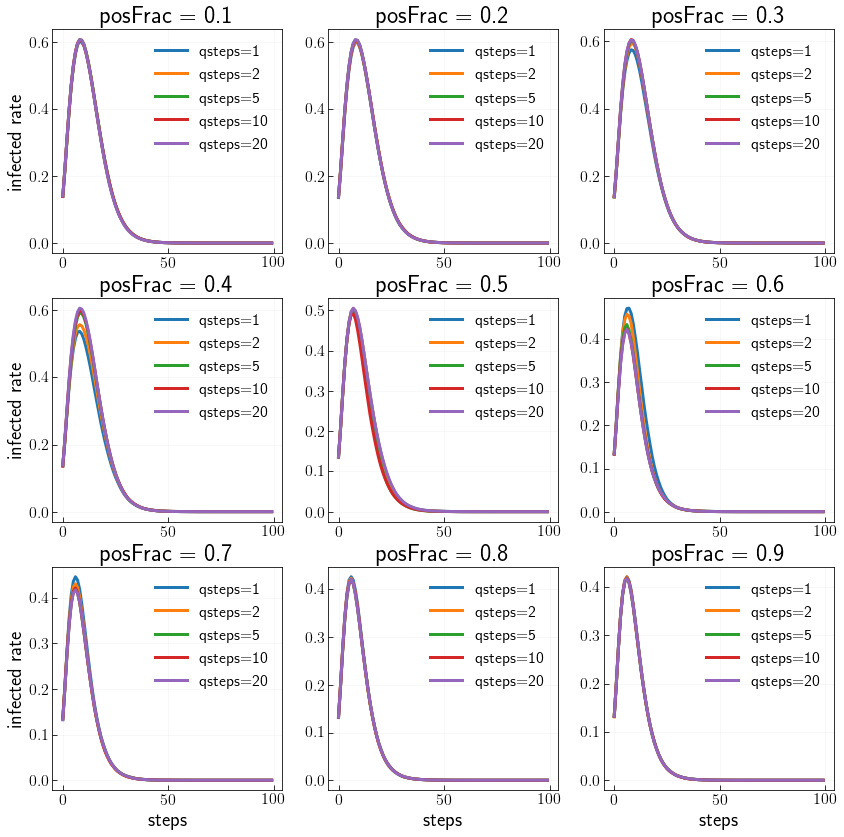

In [35]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 3, 1)
plot_infected_per_pos_opinion_fraction('on', '0.1', '0.01')
plt.xlabel('')

plt.subplot(3, 3, 2)
plot_infected_per_pos_opinion_fraction('on', '0.2', '0.01')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 3)
plot_infected_per_pos_opinion_fraction('on', '0.3', '0.01')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 4)
plot_infected_per_pos_opinion_fraction('on', '0.4', '0.01')
plt.xlabel('')

plt.subplot(3, 3, 5)
plot_infected_per_pos_opinion_fraction('on', '0.5', '0.01')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 6)
plot_infected_per_pos_opinion_fraction('on', '0.6', '0.01')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 7)
plot_infected_per_pos_opinion_fraction('on', '0.7', '0.01')

plt.subplot(3, 3, 8)
plot_infected_per_pos_opinion_fraction('on', '0.8', '0.01')
plt.ylabel('')

plt.subplot(3, 3, 9)
plot_infected_per_pos_opinion_fraction('on', '0.9', '0.01')
plt.ylabel('')

plt.show()

(info: $\beta$=0.01)

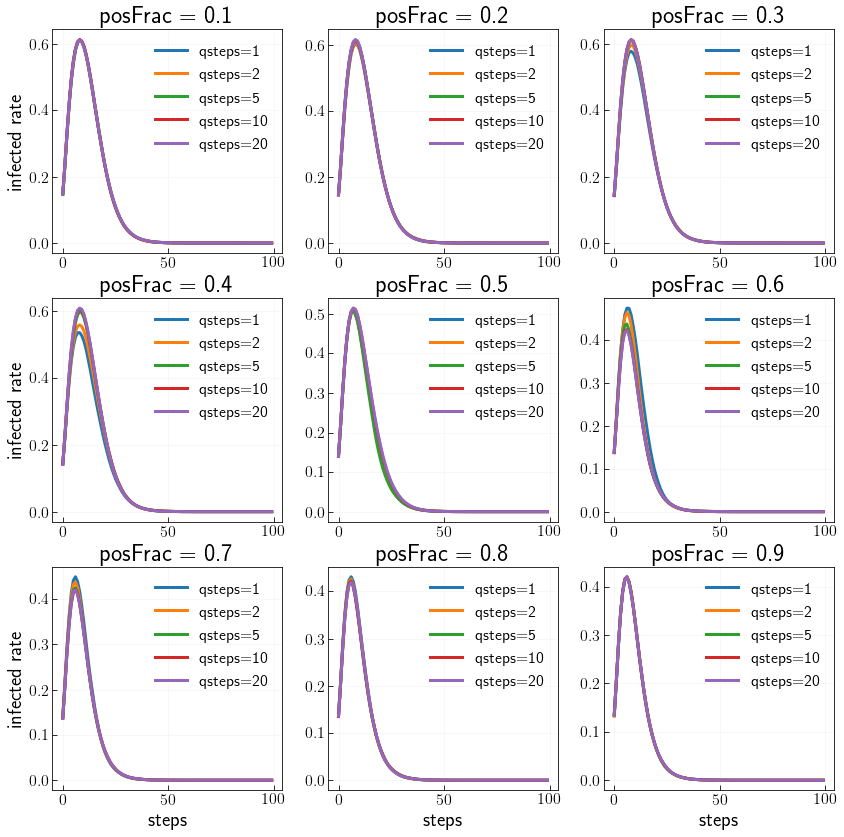

In [36]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 3, 1)
plot_infected_per_pos_opinion_fraction('on', '0.1', '0.02')
plt.xlabel('')

plt.subplot(3, 3, 2)
plot_infected_per_pos_opinion_fraction('on', '0.2', '0.02')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 3)
plot_infected_per_pos_opinion_fraction('on', '0.3', '0.02')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 4)
plot_infected_per_pos_opinion_fraction('on', '0.4', '0.02')
plt.xlabel('')

plt.subplot(3, 3, 5)
plot_infected_per_pos_opinion_fraction('on', '0.5', '0.02')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 6)
plot_infected_per_pos_opinion_fraction('on', '0.6', '0.02')
plt.ylabel('')
plt.xlabel('')

plt.subplot(3, 3, 7)
plot_infected_per_pos_opinion_fraction('on', '0.7', '0.02')

plt.subplot(3, 3, 8)
plot_infected_per_pos_opinion_fraction('on', '0.8', '0.02')
plt.ylabel('')

plt.subplot(3, 3, 9)
plot_infected_per_pos_opinion_fraction('on', '0.9', '0.02')
plt.ylabel('')

plt.show()

(info: $\beta$ = 0.02)

### Wysokość piku zachorowań w zależności od początkowej opinii

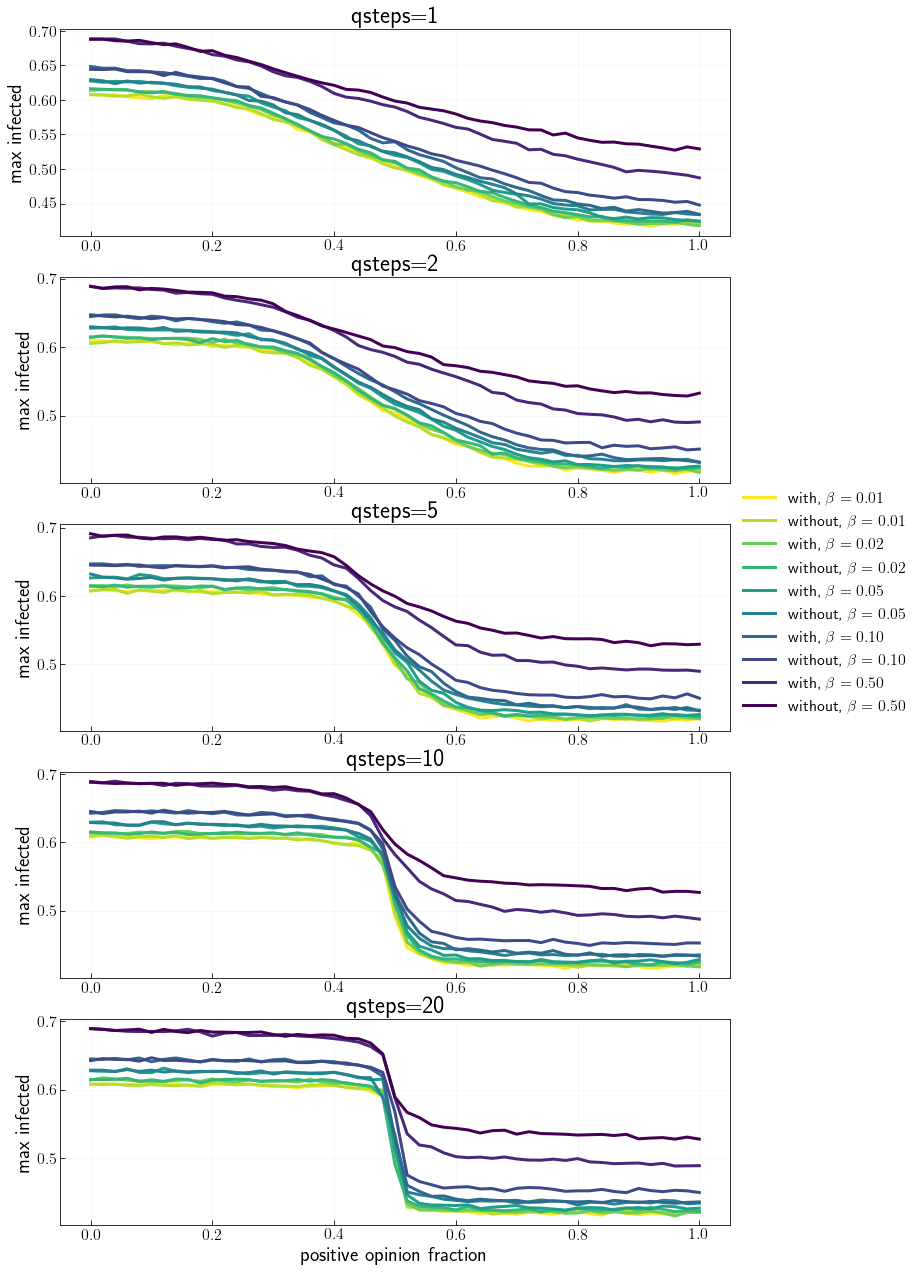

In [38]:
plt.figure(figsize=(12, 22))
plt.subplot(5, 1, 1)
plot_all_vals(ys0, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=2)
plt.title('qsteps=1')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 2)
plot_all_vals(ys1, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=2)
plt.title('qsteps=2')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 3)
plot_all_vals(ys2, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=1)
plt.title('qsteps=5')
plt.xlabel('')

plt.subplot(5, 1, 4)
plot_all_vals(ys3, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=2)
plt.title('qsteps=10')
plt.xlabel('')
plt.legend('')

plt.subplot(5, 1, 5)
plot_all_vals(ys4, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=2)
plt.title('qsteps=20')
plt.legend('')
plt.show()

Im większe `p` tym różnica pomiędzy mechanizmem usuwania linków dla małych wartości odestku opinii pozytywnej jest większa. 

In [43]:
def plot_fraction_with_without_max_infected(ys, title):
    fraction_with_without_max_infected = []
    fun = lambda x: max_by_columns(x, 'infectedRate')
    for i in range(len(ys)):
        y1 = ys[i][0]
        y2 = ys[i][1]
        y12 = fun(y1) / fun(y2)
        fraction_with_without_max_infected.append(y12)
        plt.plot(x, y12, color=colors[2*i], label=betas[i])
        
    plt.ylabel('max infected with / max infected without')
    plt.legend(loc=(1.05, 0.05), ncol=1)
    plt.xlabel('positive opinion fraction')
    plt.title(title)
    plt.ylim(0.9, 1.0)

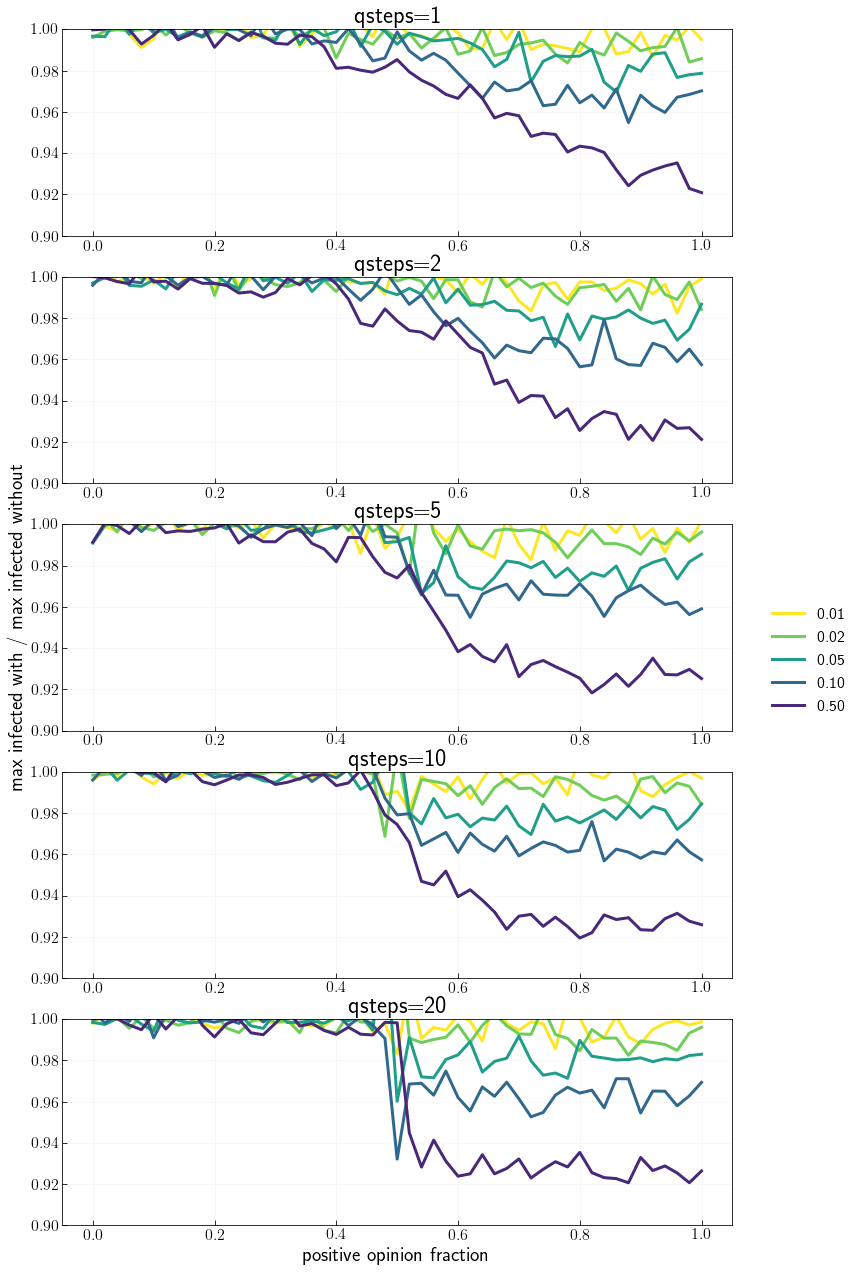

In [44]:
plt.figure(figsize=(12, 22))
plt.subplot(5, 1, 1)
plot_fraction_with_without_max_infected(ys0, 'qsteps=1')
plt.legend('')
plt.xlabel('')
plt.ylabel('')

plt.subplot(5, 1, 2)
plot_fraction_with_without_max_infected(ys1, 'qsteps=2')
plt.legend('')
plt.xlabel('')
plt.ylabel('')

plt.subplot(5, 1, 3)
plot_fraction_with_without_max_infected(ys2, 'qsteps=5')
plt.xlabel('')

plt.subplot(5, 1, 4)
plot_fraction_with_without_max_infected(ys3, 'qsteps=10')
plt.xlabel('')
plt.legend('')
plt.ylabel('')

plt.subplot(5, 1, 5)
plot_fraction_with_without_max_infected(ys4, 'qsteps=20')
plt.legend('')
plt.ylabel('')
plt.show()

### Ostateczna wartość osób wyzdrowiałych

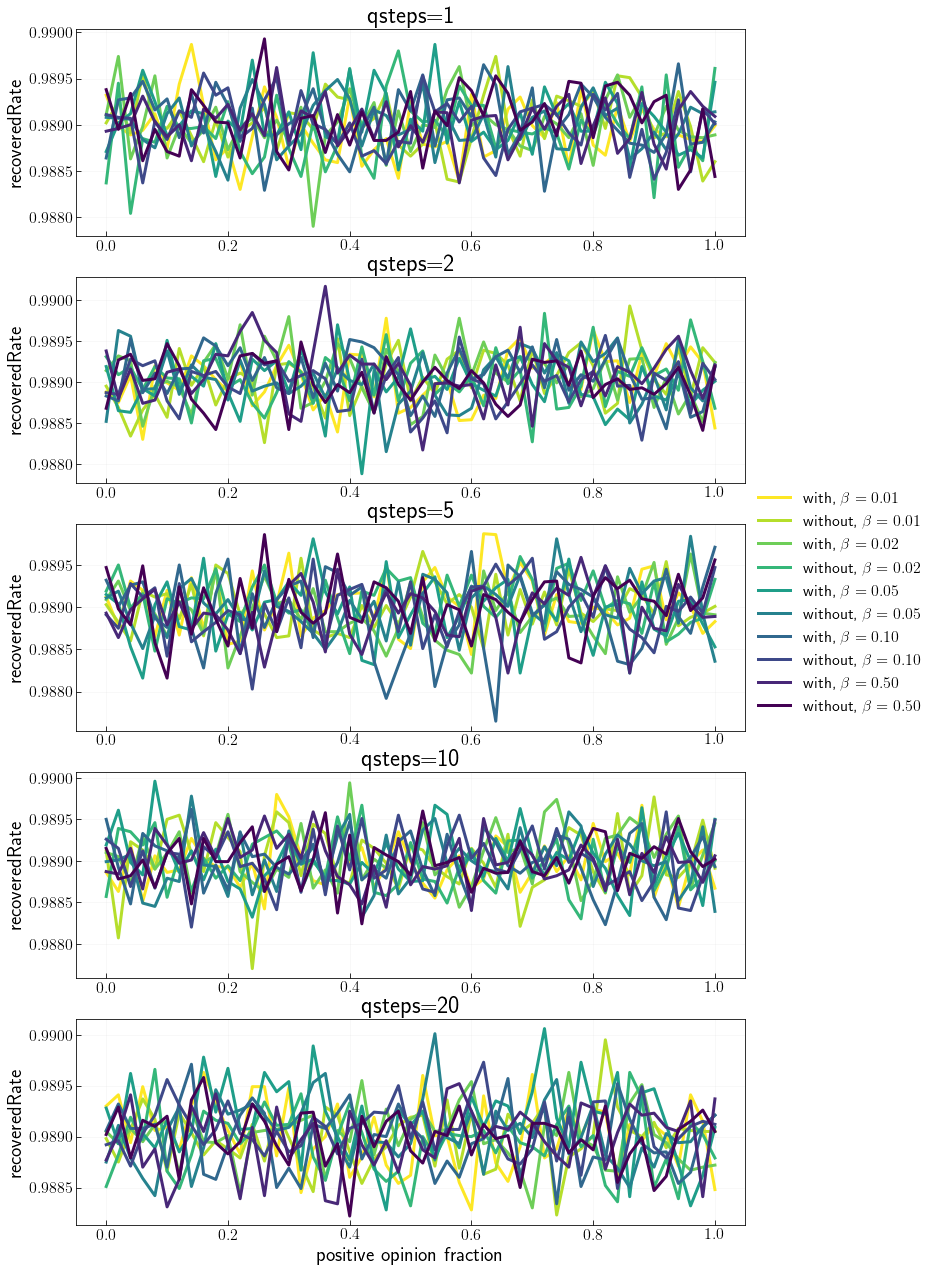

In [46]:
plt.figure(figsize=(12, 22))
plt.subplot(5, 1, 1)
plot_all_vals(ys0, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=2)
plt.title('qsteps=1')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 2)
plot_all_vals(ys1, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=2)
plt.title('qsteps=2')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 3)
plot_all_vals(ys2, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=1)
plt.title('qsteps=5')
plt.xlabel('')

plt.subplot(5, 1, 4)
plot_all_vals(ys3, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=1)
plt.title('qsteps=10')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 5)
plot_all_vals(ys4, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=2)
plt.title('qsteps=20')
plt.legend('')
plt.show()

Dla `p=0.01` można zaoobserwować punkt od którego mechanizm usuwania linków daje jakieś korzyści (około 0.4). Jeśli zwiększamy `p` to ten punkt przesuwa się w lewą stronę, aż dla `p=0.2` efekt usuwania linków jest widoczny dla każdej wartości początkowego odestku osób pozytywnych.

In [47]:
def plot_recovered_rate_with_without(ys, title):
    fun = lambda x: last_by_columns(x, 'recoveredRate')

    tmp1 = []
    for i in range(len(ys1)):
        y1 = ys[i][0]
        y2 = ys[i][1]
        y12 = fun(y1) / fun(y2)
        tmp1.append(y12)
        plt.plot(x, y12, color=colors[2*i], label=betas[i])

    plt.legend(loc=(1.05, 0.05), ncol=1)
    plt.ylabel('recoveredRate with / without')
    plt.xlabel('positive opinion fraction')
    plt.title(title)
    plt.ylim(0.5, 1.0)

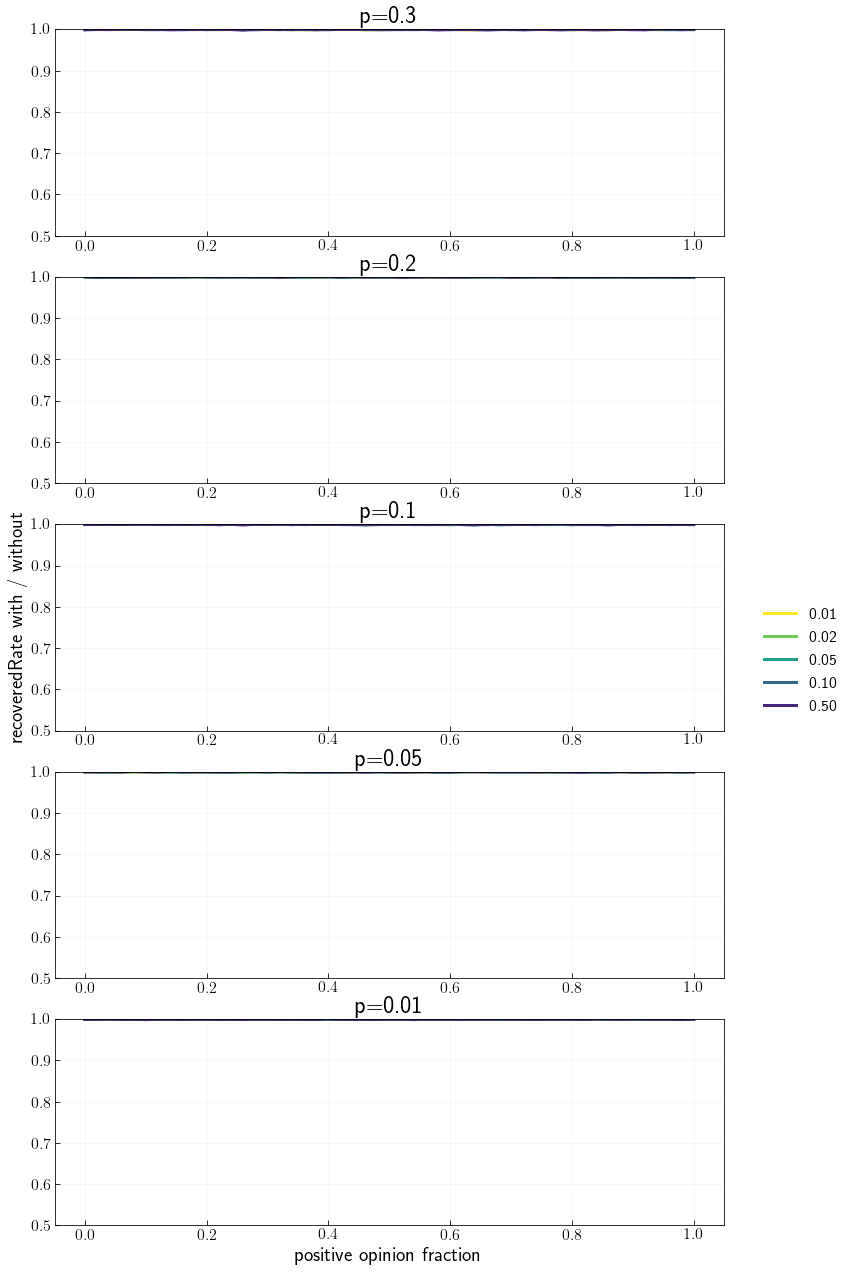

In [48]:
plt.figure(figsize=(12, 22))
plt.subplot(5, 1, 1)
plot_recovered_rate_with_without(ys0, 'p=0.3')
plt.legend('')
plt.xlabel('')
plt.ylabel('')

plt.subplot(5, 1, 2)
plot_recovered_rate_with_without(ys1, 'p=0.2')
plt.legend('')
plt.xlabel('')
plt.ylabel('')

plt.subplot(5, 1, 3)
plot_recovered_rate_with_without(ys2, 'p=0.1')
plt.xlabel('')

plt.subplot(5, 1, 4)
plot_recovered_rate_with_without(ys3, 'p=0.05')
plt.xlabel('')
plt.legend('')
plt.ylabel('')

plt.subplot(5, 1, 5)
plot_recovered_rate_with_without(ys4, 'p=0.01')
plt.legend('')
plt.ylabel('')
plt.show()

Podobnie jak w przypadku piku zachorowań, mechanizm usuwania linków dobrze działa dla społeczeństwa, które działa niezależnie i większość jest negatywnie nastawiona oraz przy społeczeństwie o pozytywnych poglądach, ale kiedy agenci działają w grupie.

### Pierwszy czas po którym w społeczeństwie będzie mniej niż 1% osób podatnych

Wartość zero na poniższym wykresie oznacza to, że nigdy nie dojdzie do sytuacji, że będzie mniej niż 1% osób podatnych. Czyli po prostu zostanie część osób podatnych.

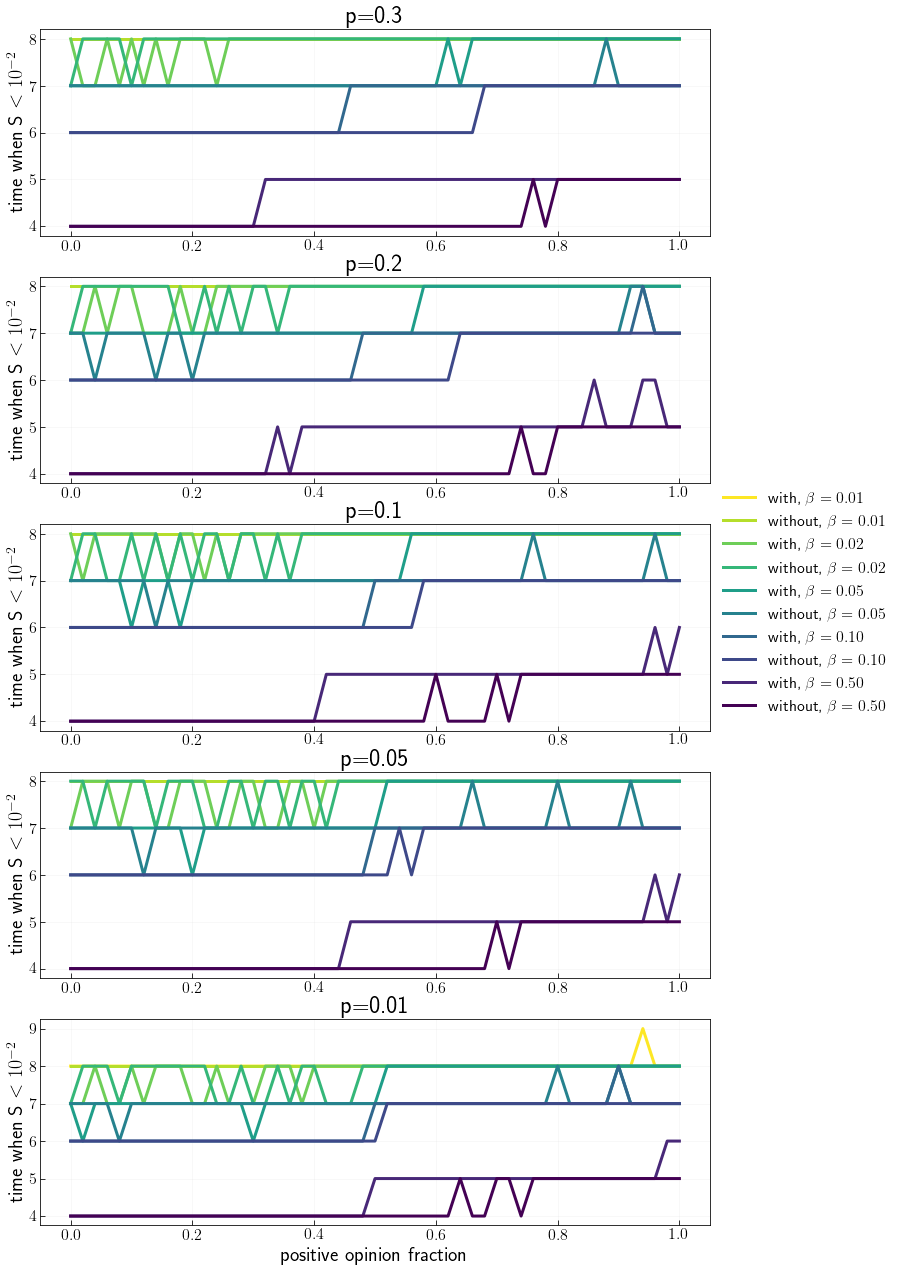

In [49]:
plt.figure(figsize=(12, 22))
plt.subplot(5, 1, 1)
plot_all_vals(ys0, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=2)
plt.title('p=0.3')
plt.legend('')
plt.xlabel('')


plt.subplot(5, 1, 2)
plot_all_vals(ys1, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=2)
plt.title('p=0.2')
plt.legend('')
plt.xlabel('')

plt.subplot(5, 1, 3)
plot_all_vals(ys2, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=1)
plt.title('p=0.1')
plt.xlabel('')

plt.subplot(5, 1, 4)
plot_all_vals(ys3, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=1)
plt.title('p=0.05')
plt.xlabel('')
plt.legend('')

plt.subplot(5, 1, 5)
plot_all_vals(ys4, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=2)
plt.title('p=0.01')
plt.legend('')
plt.show()

Im większe `p` tym czas po którym w społeczeństwie będzie mniej niż 1% osób podatnych rośnie.